# Data Pre-Processing: assignment #5 - How to preprocess numerical and categorical variables together?

##### Assignement Guide

In [1]:
#Assignement Guide
import Utilities as Util

file_Description_name = "AssigmentGuide.txt"
#Util.read_txt(file_Description_name)

##### Dataset description

In [2]:
#Dataset description

file_Description_name = "Dataset/DatasetDescription.txt"
#Util.read_txt(file_Description_name)

##### Dataset addizional dataset description

In [3]:
#Addizional dataset description

file_Description_name = "Dataset/bank-additional-names.txt"
#Util.read_txt(file_Description_name)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import json
import apply_preprocessing_V2_3 as apply_pp 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import PowerTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

import pickle
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Read Dataset
Dataset = pd.read_csv('Dataset/bank-additional-full.csv',sep = ';')
Dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#Dataset columns
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
#Data set size
Dataset.shape

(41188, 21)

In [8]:
#Verify duplicates
Dataset = Dataset.drop_duplicates()

In [9]:
#Data set size
Dataset.shape

(41176, 21)

In [10]:
#Count Nan values
Dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
#Data types 
Dataset.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [12]:
#Data types 
Dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [13]:
#Data type trasformation 

Dataset['age'] = Dataset['age'].astype('int')

In [14]:
#Handling 'yes' no 'no' datas

Dataset['y'] = Dataset['y'].replace({'no': 0,'yes':1})

In [15]:
#Remove columns "duration" from dataset

Dataset=Dataset.drop(['duration'], axis = 1)

In [16]:
Dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Data Analisis ( Basic )

**BUSINESS USE CASE : Bank Marketing:**

**Abstract:**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [17]:
#Dataset description

file_Description_name = "Dataset/DatasetDescription.txt"
#Util.read_txt(file_Description_name)

In [18]:
#Dataset description
Dataset.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [19]:
#modes

#clients who subscribed
client_subscribed = Dataset[Dataset['y']== 1]
Mode_client_subscribed = client_subscribed.mode()


#clients who NON subscribed
client_NON_subscribed = Dataset[Dataset['y'] == 0]
Mode_client_NON_subscribed = client_NON_subscribed.mode()


In [20]:
print("The clients who SUBSCRIBED mostly : \n")
Mode_client_subscribed

The clients who SUBSCRIBED mostly : 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,admin.,married,university.degree,no,yes,no,cellular,may,thu,1,999,0,nonexistent,-1.8,92.893,-46.2,4.962,5099.1,1


In [21]:
print("The clients who NON SUBSCRIBED mostly : \n")
Mode_client_NON_subscribed

The clients who NON SUBSCRIBED mostly : 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,admin.,married,university.degree,no,yes,no,cellular,may,mon,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,0


<AxesSubplot:>

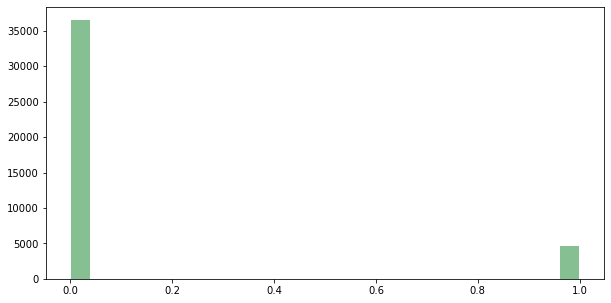

In [22]:
#Ploting
Dataset['y'].hist(bins=25, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9)

Suscribers distributions based on their Ages :
 


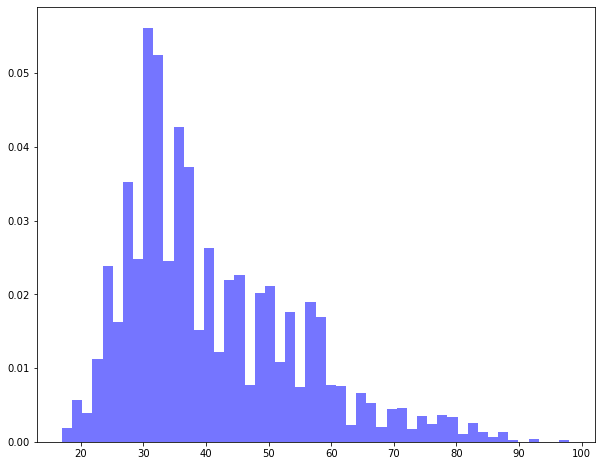

In [23]:
# Plotting the histogram.
print('Suscribers distributions based on their Ages :\n ')

plt.figure(figsize=(10,8))
Dataset_test = client_subscribed
plt.hist(Dataset_test['age'], bins=50, density=True, alpha=0.9, color='#6666FF')
  
plt.show()

The graph shows the normal distribution of subscribers on the basis of their **ages** of the *subscribers*. There is a **high density between 30 and 40 years old** 

Suscribers distributions based on their Marital status :
 


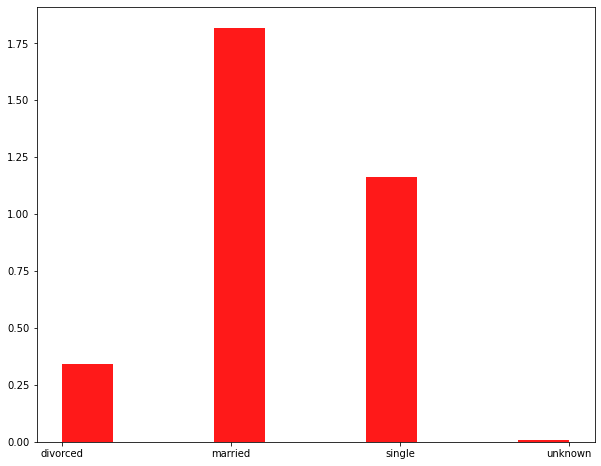

In [24]:
# Plotting the histogram.
print('Suscribers distributions based on their Marital status :\n ')

plt.figure(figsize=(10,8))
Dataset_test = client_subscribed
plt.hist(Dataset_test['marital'], bins=10, density=True, alpha=0.9, color='r')
  
plt.show()

The graph shows the normal distribution of subscribers on the basis of their **marital status**. There is a **dominant peak among married subscribers and very low among divorced ones**

Suscribers distributions based on their Education levels :
 


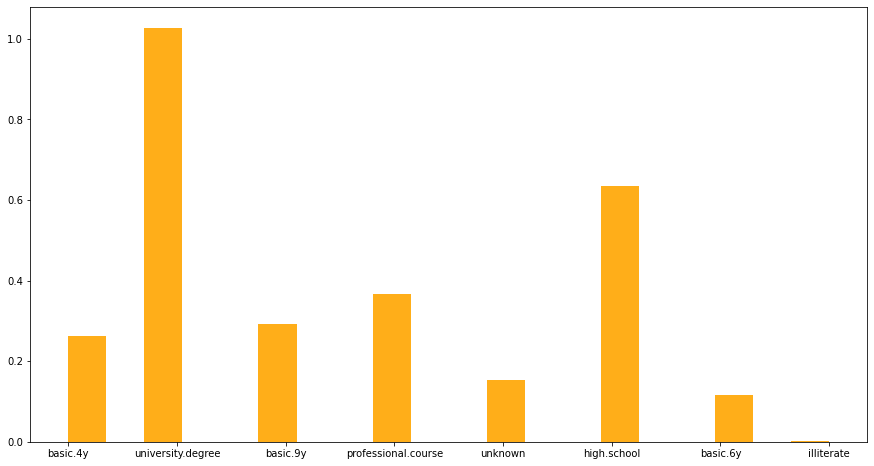

In [25]:
# Plotting the histogram.
print('Suscribers distributions based on their Education levels :\n ')

plt.figure(figsize=(15,8))
Dataset_test = client_subscribed
plt.hist(Dataset_test['education'], bins=20, density=True, alpha=0.9, color='orange')
  
plt.show()

In [26]:
Dataset = pd.DataFrame(Dataset)

The graph shows the normal distribution of subscribers on the basis of their **Education levels**. There is a **dominant peak among subscribers whith university degrees**

### Data Preparation (before preprocessing )

In [27]:
#split Dataset into train and test

#train, test = train_test_split(Dataset, shuffle=True, test_size=0.2, random_state=50)
#test.to_csv('Dataset/test.csv', header=True, index=False, sep=',')

In [28]:
#shape
#train.shape , test.shape

In [29]:
#Convert into Dataframe
#train = pd.DataFrame(train)

In [30]:
#train.dtypes.value_counts()

In [31]:
#reviewing dataset

#train.head()

#### Preprossessing ( Offline training ) 

In [32]:
#X_train Feature Matrix  and  #y_train Target Variable

#X_train, y_train = train.drop(columns='y'), train['y']  

In [33]:

#Separate numerical , and categorical variables 

#X_train_numeric_data = X_train.select_dtypes(include=[np.number])
#X_train_categorical_data = X_train.select_dtypes(exclude=[np.number])

In [34]:
#X_train_numeric_data.head()

In [35]:
#X_train_categorical_data.head()

In [36]:
#y_train.head()

In [37]:
#PowerTransformer on numerical variables 

#power = PowerTransformer()
#X_train_numeric_data_Power = power.fit_transform(X_train_numeric_data)

In [38]:
#OneHotEncoder on categoricals  variables 

#encoder = OneHotEncoder(sparse=False, drop=None)
#X_train_categorical_data_encorder = encoder.fit_transform(X_train_categorical_data)

In [39]:
#Reshape
#X_train_categorical_data_encorder.shape

In [40]:
#Dataframe
#X_train_numeric_data_Power = pd.DataFrame(X_train_numeric_data_Power, columns=X_train_numeric_data.columns)
#X_train_categorical_data_encorder = pd.DataFrame(X_train_categorical_data_encorder, columns=encoder.get_feature_names_out())

In [41]:
#X_train_numeric_data_Power.shape, X_train_categorical_data_encorder.shape

In [42]:
# Merge the two pre-processed datasets, the first containing only numeric variables and the second containing only categorical variables
#pp_X_train = pd.merge(X_train_numeric_data_Power, X_train_categorical_data_encorder, how='inner',left_index=True, right_index=True)
#pp_X_train.shape

In [43]:
#pp_X_train.head()

In [44]:
#Save for OFFLINE TRAINING ###

# Save/serialize the fitted encoder to local OS
#with open('pickle/OneHotEncoder.pkl', 'wb') as output_file:
#    pickle.dump(encoder, output_file)
      
# Save/serialize the fitted encoder to local OS
#with open('pickle/PowerTransformer.pkl', 'wb') as output_file:
#    pickle.dump(power, output_file)

In [45]:
#NaN values check

#pp_X_train.isnull().sum()

In [46]:
#missinggno is used to visualized missing values
#print("\n\n--> Missing values visualizasion :\n\n")
#msno.matrix(pp_X_train,figsize=(25, 3))

In [47]:
train, test = train_test_split(Dataset, shuffle=True, test_size=0.2, random_state=50)
        
test.to_csv('Dataset/test.csv', header=True, index=False, sep=',')

In [48]:
#train = pd.DataFrame(train)

In [49]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
479,41,management,married,unknown,unknown,no,no,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9804,39,technician,divorced,professional.course,no,no,no,telephone,jun,wed,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
36961,43,technician,single,university.degree,no,no,no,cellular,jul,thu,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,0
28392,41,technician,married,university.degree,unknown,no,yes,cellular,apr,thu,1,999,1,failure,-1.8,93.075,-47.1,1.435,5099.1,0
33963,29,admin.,married,high.school,no,no,no,cellular,may,wed,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,0


In [50]:
# Using my vesion

pp_X_train , pp_y_train  = apply_pp.apply_preprocessing_V4(train, 'y',is_training=True)  # To retrieve our target y

In [51]:
pp_X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.250361,-1.045566,0.193683,-0.396857,0.557162,0.699752,0.917776,0.711387,0.136279,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.054022,0.242840,0.193683,-0.396857,0.937673,1.633790,-0.228238,0.799913,0.983919,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.435525,-1.045566,0.193683,-0.396857,-1.538419,-1.788508,1.449886,-1.444683,-1.356117,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.250361,-1.045566,0.193683,2.518934,-1.251735,-0.889454,-1.506865,-1.331467,-1.155546,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.149511,-1.045566,0.193683,2.518934,-1.251735,-1.171047,-1.278979,-1.381863,-1.155546,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [52]:
pp_y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [53]:
y_train = pp_y_train # To retrieve our features 

In [54]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

### Build Model

In [55]:
#Model

model = DecisionTreeClassifier()

In [56]:
model.fit(X=pp_X_train, y=y_train)

DecisionTreeClassifier()

In [57]:
# Save/serialize the fitted model to local OS
with open('pickle/model.pkl', 'wb') as output_file:
    pickle.dump(model, output_file)